In [1]:
import torch
import numpy as np
from torch.autograd import Variable

In [2]:
np_data=np.arange(6).reshape((2,3))

In [7]:
np_data

array([[0, 1, 2],
       [3, 4, 5]])

In [3]:
torch_data=torch.from_numpy(np_data)

In [4]:
tensor=torch.FloatTensor(np_data)

In [5]:
variable=Variable(tensor, requires_grad=True)
v_out = torch.mean(variable*variable) 
v_out.backward() 
variable.grad

In [2]:
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
x = torch.linspace(-5, 5, 200)  # x data (tensor), shape=(200, 1)
x = Variable(x)
x_np = x.data.numpy()

In [17]:
y_relu = F.relu(x).data.numpy()
y_sigmoid = torch.sigmoid(x).data.numpy()
y_tanh = F.tanh(x).data.numpy()
y_softplus = F.softplus(x).data.numpy()

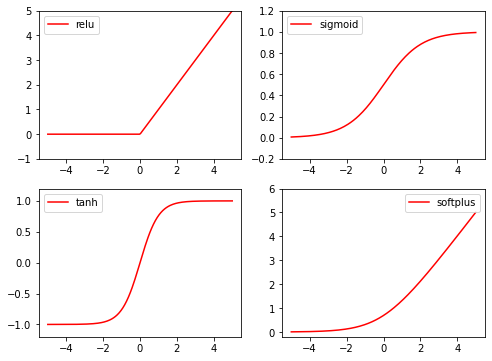

In [19]:
plt.figure(1, figsize=(8, 6))
plt.subplot(221)
plt.plot(x_np, y_relu, c='red', label='relu')
plt.ylim((-1, 5))
plt.legend(loc='best')

plt.subplot(222)
plt.plot(x_np, y_sigmoid, c='red', label='sigmoid')
plt.ylim((-0.2, 1.2))
plt.legend(loc='best')

plt.subplot(223)
plt.plot(x_np, y_tanh, c='red', label='tanh')
plt.ylim((-1.2, 1.2))
plt.legend(loc='best')

plt.subplot(224)
plt.plot(x_np, y_softplus, c='red', label='softplus')
plt.ylim((-0.2, 6))
plt.legend(loc='best')

plt.show()

### Regression

In [20]:
torch.manual_seed(1)

In [3]:
x = torch.unsqueeze(torch.linspace(-1, 1, 200), dim=1)
y = x.pow(2) + 0.2*torch.rand(x.size())

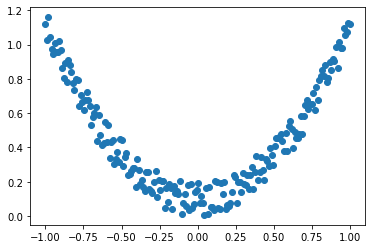

In [4]:
plt.scatter(x.data.numpy(), y.data.numpy())
plt.show()

In [5]:
class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden)   # hidden layer
        self.predict = torch.nn.Linear(n_hidden, n_output)   # output layer

    def forward(self, x):
        x = F.relu(self.hidden(x))      # activation function for hidden layer
        x = self.predict(x)             # linear output
        return x


In [6]:
net = Net(n_feature=1, n_hidden=10, n_output=1) 
optimizer = torch.optim.SGD(net.parameters(), lr=0.2)
loss_func = torch.nn.MSELoss()  # this is for regression mean squared loss

In [7]:
plt.ion()   # something about plotting

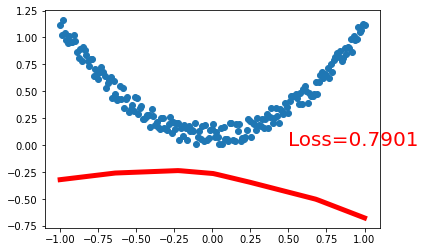

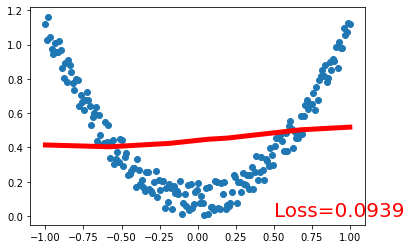

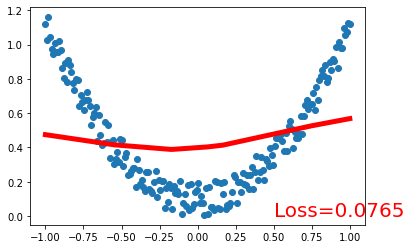

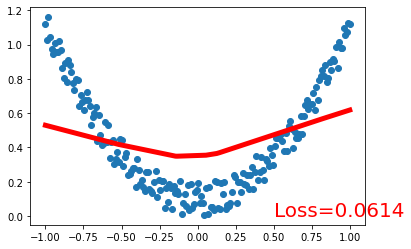

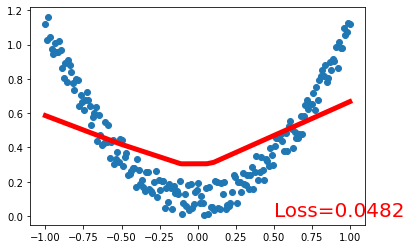

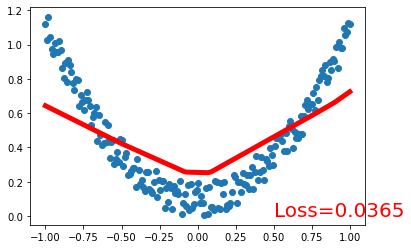

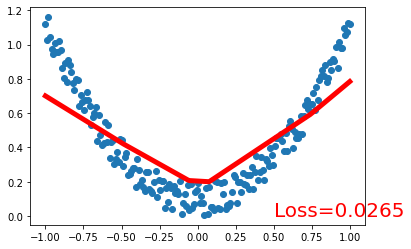

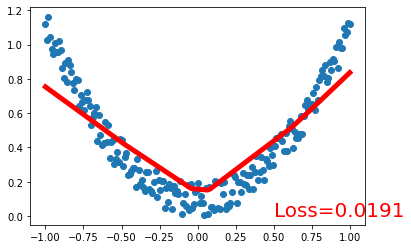

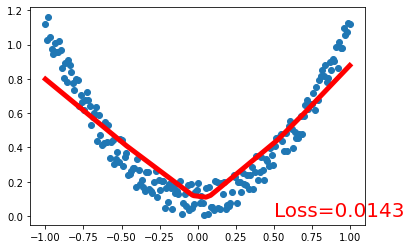

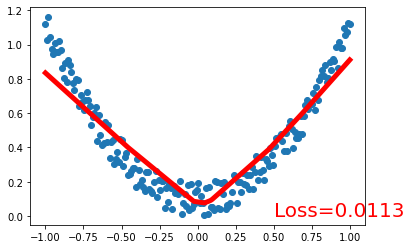

In [8]:
for t in range(100):
    prediction = net(x)     # input x and predict based on x

    loss = loss_func(prediction, y)     # must be (1. nn output, 2. target)

    optimizer.zero_grad()   # clear gradients for next train
    loss.backward()         # backpropagation, compute gradients
    optimizer.step()        # apply gradients

    if t % 10 == 0:
        # plot and show learning process
        plt.cla()
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)
        plt.text(0.5, 0, 'Loss=%.4f' % loss.data.numpy(), fontdict={'size': 20, 'color':  'red'})
        plt.show()
        plt.pause(0.1)

plt.ioff()

### Classification

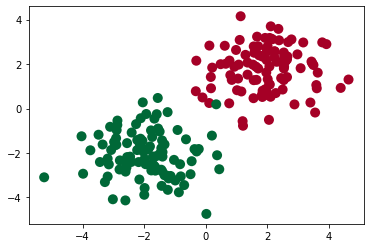

In [37]:
# make fake data
n_data = torch.ones(100, 2)
x0 = torch.normal(2*n_data, 1)      # class0 x data (tensor), shape=(100, 2)
y0 = torch.zeros(100)               # class0 y data (tensor), shape=(100, 1)
x1 = torch.normal(-2*n_data, 1)     # class1 x data (tensor), shape=(100, 2)
y1 = torch.ones(100)                # class1 y data (tensor), shape=(100, 1)
x = torch.cat((x0, x1), 0).type(torch.FloatTensor)  # shape (200, 2) FloatTensor = 32-bit floating
y = torch.cat((y0, y1), ).type(torch.LongTensor)    # shape (200,) LongTensor = 64-bit integer

# torch can only train on Variable, so convert them to Variable
x, y = Variable(x), Variable(y)

plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=y.data.numpy(), s=100, lw=0, cmap='RdYlGn')
plt.show()

In [38]:
class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden)   # hidden layer
        self.out = torch.nn.Linear(n_hidden, n_output)   # output layer

    def forward(self, x):
        x = F.relu(self.hidden(x))      # activation function for hidden layer
        x = self.out(x)
        return x
net = Net(n_feature=2, n_hidden=10, n_output=2)     # define the network

# Loss and Optimizer
# Softmax is internally computed.
# Set parameters to be updated.
optimizer = torch.optim.SGD(net.parameters(), lr=0.02)
loss_func = torch.nn.CrossEntropyLoss()  # the target label is NOT an one-hotted

<ipython-input-39-3d9e9f760e74>:12: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  _, prediction = torch.max(F.softmax(out), 1)


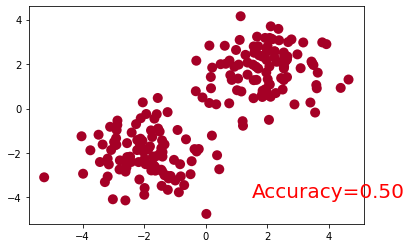

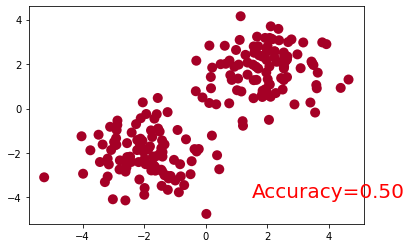

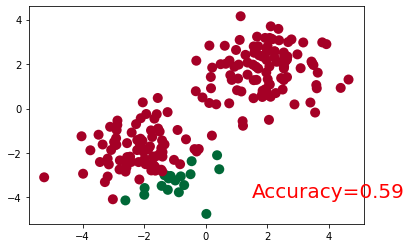

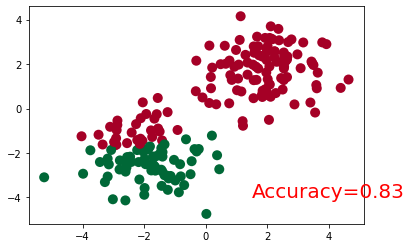

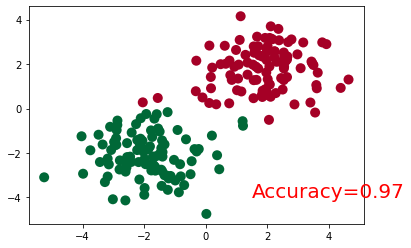

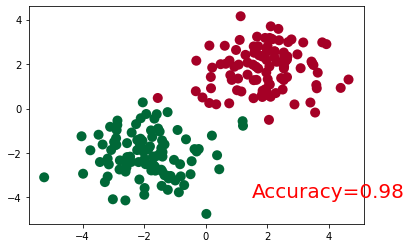

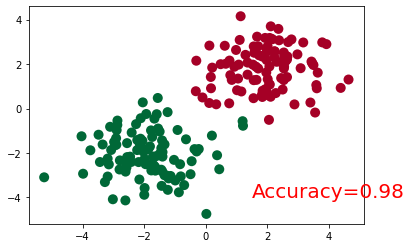

In [39]:
for t in range(50):
    out = net(x)                 # input x and predict based on x
    loss = loss_func(out, y)     # must be (1. nn output, 2. target), the target label is NOT one-hotted

    optimizer.zero_grad()   # clear gradients for next train
    loss.backward()         # backpropagation, compute gradients
    optimizer.step()        # apply gradients
    
    if t % 10 == 0 or t in [3, 6]:
        # plot and show learning process
        plt.cla()
        _, prediction = torch.max(F.softmax(out), 1)
        pred_y = prediction.data.numpy().squeeze()
        target_y = y.data.numpy()
        plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=pred_y, s=100, lw=0, cmap='RdYlGn')
        accuracy = sum(pred_y == target_y)/200.
        plt.text(1.5, -4, 'Accuracy=%.2f' % accuracy, fontdict={'size': 20, 'color':  'red'})
        plt.show()
        plt.pause(0.1)

plt.ioff()

### Build NN Quickly

In [40]:
# replace following class code with an easy sequential network
class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden)   # hidden layer
        self.predict = torch.nn.Linear(n_hidden, n_output)   # output layer

    def forward(self, x):
        x = F.relu(self.hidden(x))      # activation function for hidden layer
        x = self.predict(x)             # linear output
        return x


net1 = Net(1, 10, 1)

In [41]:
# easy and fast way to build your network
net2 = torch.nn.Sequential(
    torch.nn.Linear(1, 10),
    torch.nn.ReLU(),
    torch.nn.Linear(10, 1)
)

### Save and Reload

In [42]:
x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)  # x data (tensor), shape=(100, 1)
y = x.pow(2) + 0.2*torch.rand(x.size())  # noisy y data (tensor), shape=(100, 1)
x, y = Variable(x, requires_grad=False), Variable(y, requires_grad=False)

In [43]:
def save():
    # save net1
    net1 = torch.nn.Sequential(
        torch.nn.Linear(1, 10),
        torch.nn.ReLU(),
        torch.nn.Linear(10, 1)
    )
    optimizer = torch.optim.SGD(net1.parameters(), lr=0.5)
    loss_func = torch.nn.MSELoss()

    for t in range(100):
        prediction = net1(x)
        loss = loss_func(prediction, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # plot result
    plt.figure(1, figsize=(10, 3))
    plt.subplot(131)
    plt.title('Net1')
    plt.scatter(x.data.numpy(), y.data.numpy())
    plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)

    # 2 ways to save the net
    torch.save(net1, 'net.pkl')  # save entire net
    torch.save(net1.state_dict(), 'net_params.pkl')   # save only the parameters

In [45]:
def restore_net():
    # restore entire net1 to net2
    net2 = torch.load('net.pkl')
    prediction = net2(x)

    # plot result
    plt.subplot(132)
    plt.title('Net2')
    plt.scatter(x.data.numpy(), y.data.numpy())
    plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)
    
def restore_params():
    # restore only the parameters in net1 to net3
    net3 = torch.nn.Sequential(
        torch.nn.Linear(1, 10),
        torch.nn.ReLU(),
        torch.nn.Linear(10, 1)
    )

    # copy net1's parameters into net3
    net3.load_state_dict(torch.load('net_params.pkl'))
    prediction = net3(x)

    # plot result
    plt.subplot(133)
    plt.title('Net3')
    plt.scatter(x.data.numpy(), y.data.numpy())
    plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)
    plt.show()

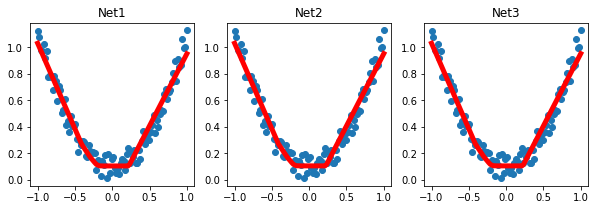

In [46]:
# save net1
save()
# restore entire net (may slow)
restore_net()
# restore only the net parameters
restore_params()

### Batch train

In [47]:
import torch
import torch.utils.data as Data

In [48]:

x = torch.linspace(1, 10, 10)       # this is x data (torch tensor)
y = torch.linspace(10, 1, 10)       # this is y data (torch tensor)
torch_dataset = Data.TensorDataset(x, y)

In [50]:
BATCH_SIZE = 5
loader = Data.DataLoader(
    dataset=torch_dataset,      # torch TensorDataset format
    batch_size=BATCH_SIZE,      # mini batch size
    shuffle=True,               # random shuffle for training
    num_workers=2,              # subprocesses for loading data
)
for epoch in range(3):   # train entire dataset 3 times
    for step, (batch_x, batch_y) in enumerate(loader):  # for each training step
        # train your data...
        print('Epoch: ', epoch, '| Step: ', step, '| batch x: ',
              batch_x.numpy(), '| batch y: ', batch_y.numpy())

Epoch:  0 | Step:  0 | batch x:  [4. 6. 9. 8. 5.] | batch y:  [7. 5. 2. 3. 6.]
Epoch:  0 | Step:  1 | batch x:  [10.  7.  2.  1.  3.] | batch y:  [ 1.  4.  9. 10.  8.]
Epoch:  1 | Step:  0 | batch x:  [ 5. 10.  7.  3.  9.] | batch y:  [6. 1. 4. 8. 2.]
Epoch:  1 | Step:  1 | batch x:  [6. 2. 4. 8. 1.] | batch y:  [ 5.  9.  7.  3. 10.]
Epoch:  2 | Step:  0 | batch x:  [7. 5. 9. 8. 6.] | batch y:  [4. 6. 2. 3. 5.]
Epoch:  2 | Step:  1 | batch x:  [ 4.  2.  3.  1. 10.] | batch y:  [ 7.  9.  8. 10.  1.]


In [51]:
BATCH_SIZE = 8
loader = Data.DataLoader(
    dataset=torch_dataset,      # torch TensorDataset format
    batch_size=BATCH_SIZE,      # mini batch size
    shuffle=True,               # random shuffle for training
    num_workers=2,              # subprocesses for loading data
)
for epoch in range(3):   # train entire dataset 3 times
    for step, (batch_x, batch_y) in enumerate(loader):  # for each training step
        # train your data...
        print('Epoch: ', epoch, '| Step: ', step, '| batch x: ',
              batch_x.numpy(), '| batch y: ', batch_y.numpy())

Epoch:  0 | Step:  0 | batch x:  [ 2.  1.  5. 10.  4.  7.  3.  6.] | batch y:  [ 9. 10.  6.  1.  7.  4.  8.  5.]
Epoch:  0 | Step:  1 | batch x:  [8. 9.] | batch y:  [3. 2.]
Epoch:  1 | Step:  0 | batch x:  [ 3.  9.  6. 10.  5.  7.  1.  4.] | batch y:  [ 8.  2.  5.  1.  6.  4. 10.  7.]
Epoch:  1 | Step:  1 | batch x:  [8. 2.] | batch y:  [3. 9.]
Epoch:  2 | Step:  0 | batch x:  [ 6. 10.  9.  8.  2.  4.  7.  5.] | batch y:  [5. 1. 2. 3. 9. 7. 4. 6.]
Epoch:  2 | Step:  1 | batch x:  [3. 1.] | batch y:  [ 8. 10.]


### Optimizers

In [52]:
LR = 0.01
BATCH_SIZE = 32
EPOCH = 12

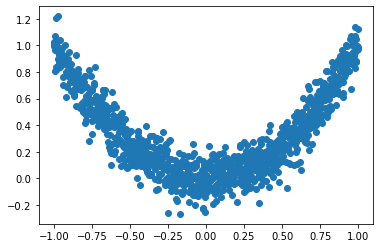

In [53]:
# fake dataset
x = torch.unsqueeze(torch.linspace(-1, 1, 1000), dim=1)
y = x.pow(2) + 0.1*torch.normal(torch.zeros(*x.size()))

# plot dataset
plt.scatter(x.numpy(), y.numpy())
plt.show()

In [54]:
torch_dataset = Data.TensorDataset(x, y)
loader = Data.DataLoader(
    dataset=torch_dataset, 
    batch_size=BATCH_SIZE, 
    shuffle=True)

In [55]:
class Net(torch.nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(1, 20)   # hidden layer
        self.predict = torch.nn.Linear(20, 1)   # output layer

    def forward(self, x):
        x = F.relu(self.hidden(x))      # activation function for hidden layer
        x = self.predict(x)             # linear output
        return x

In [56]:
net_SGD         = Net()
net_Momentum    = Net()
net_RMSprop     = Net()
net_Adam        = Net()
nets = [net_SGD, net_Momentum, net_RMSprop, net_Adam]

opt_SGD         = torch.optim.SGD(net_SGD.parameters(), lr=LR)
opt_Momentum    = torch.optim.SGD(net_Momentum.parameters(), lr=LR, momentum=0.8)
opt_RMSprop     = torch.optim.RMSprop(net_RMSprop.parameters(), lr=LR, alpha=0.9)
opt_Adam        = torch.optim.Adam(net_Adam.parameters(), lr=LR, betas=(0.9, 0.99))
optimizers = [opt_SGD, opt_Momentum, opt_RMSprop, opt_Adam]

In [57]:
loss_func = torch.nn.MSELoss()
losses_his = [[], [], [], []]   # record loss

Epoch:  0
Epoch:  1
Epoch:  2
Epoch:  3
Epoch:  4
Epoch:  5
Epoch:  6
Epoch:  7
Epoch:  8
Epoch:  9
Epoch:  10
Epoch:  11


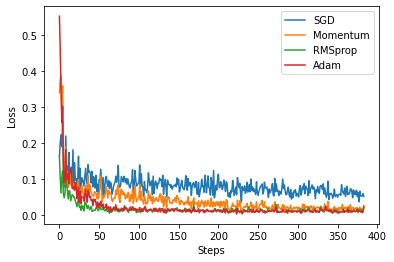

In [58]:
# training
for epoch in range(EPOCH):
    print('Epoch: ', epoch)
    for step, (batch_x, batch_y) in enumerate(loader):          # for each training step
        b_x = torch.Tensor(batch_x)
        b_y = torch.Tensor(batch_y)

        for net, opt, l_his in zip(nets, optimizers, losses_his):
            output = net(b_x)              # get output for every net
            loss = loss_func(output, b_y)  # compute loss for every net
            opt.zero_grad()                # clear gradients for next train
            loss.backward()                # backpropagation, compute gradients
            opt.step()                     # apply gradients
            l_his.append(loss.item())     # loss recoder

labels = ['SGD', 'Momentum', 'RMSprop', 'Adam']
for i, l_his in enumerate(losses_his):
    plt.plot(l_his, label=labels[i])
    plt.legend()
    plt.xlabel('Steps')
    plt.ylabel('Loss')

In [48]:
x=([[1,0],
          [1,1],
          [0,0],
          [1,0],
           [0,1]])
y=([1,0,0,1,1])
x=torch.FloatTensor(x)
y=torch.LongTensor(y)
#tensor=torch.IntTensor(xor_data)

In [55]:
class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden1 = torch.nn.Linear(n_feature, 10)
        self.hidden2 = torch.nn.Linear(10, n_hidden)# hidden layer
        #self.hidden3 = torch.nn.Linear(n_hidden,10)
        self.predict = torch.nn.Linear(n_hidden, n_output)   # output layer

    def forward(self, x):
        x = F.sigmoid(self.hidden1(x))      # activation function for hidden layer
        x = F.sigmoid(self.hidden2(x))
        #x = F.sigmoid(self.hidden3(x))
        x = F.sigmoid(self.predict(x))             # linear output
        #x = self.predict(x)
        return x
    
net=Net(2,20,2)
optimizer = torch.optim.Adam(net.parameters(), lr=0.02)
loss_func = torch.nn.CrossEntropyLoss() 

In [58]:
for t in range(1000):
    prediction = net(x)     # input x and predict based on x
    loss = loss_func(prediction, y)     # must be (1. nn output, 2. target)

    optimizer.zero_grad()   # clear gradients for next train
    loss.backward()         # backpropagation, compute gradients
    optimizer.step()        # apply gradients

    if t % 500 == 0:
        # plot and show learning process
        print (prediction)

plt.ioff()

tensor([[4.9725e-05, 9.9996e-01],
        [9.9962e-01, 3.8873e-04],
        [9.9959e-01, 4.1811e-04],
        [4.9725e-05, 9.9996e-01],
        [1.1837e-03, 9.9882e-01]], grad_fn=<SigmoidBackward>)
tensor([[2.4819e-05, 9.9998e-01],
        [9.9980e-01, 2.0133e-04],
        [9.9979e-01, 2.1572e-04],
        [2.4819e-05, 9.9998e-01],
        [6.1559e-04, 9.9939e-01]], grad_fn=<SigmoidBackward>)
